# Main Question: How did hosting the Olympics in 2016 affect Brazil?

    * Sub question 1: Was Brazil's economy affected by hosting the 2016 Rio de Janeiro Summer Olympics?
    * Sub question 2: Was Brazil's economy better or worse than other nations that hosted the Summer Olympics?

# Economic Metrics for Brazil, Greece, and the United Kingdom

    * Data source: World Bank (wbgapi is the World Bank's python package)
    * All data pulled via wbgapi python api package:
    
            * GDP (current US$) from data series: NY.GDP.MKTP.CD
            * GDP per Capita from data series: NY.GDP.PCAP.CD
            * Inflation, consumer prices (annual %) from data series: FP.CPI.TOTL.ZG  
            * Industry (including construction), value added (% of GDP) from data series: NV.IND.TOTL.ZS

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import wbdata
import wbgapi as wb
import numpy as np
import requests
import datetime
from scipy.stats import linregress

# Search query for series of data on various topics collected by the World Bank

In [2]:
# Created a search query to search the World Bank for series of data based on key words.  I used the python
# package that the World Bank developed.

search = input("Enter your single word World Bank query:\n")
results = wb.series.list(q = search)
query_df = pd.DataFrame(results)
try:
    
    if len(query_df['id']) == 0:
        print('No Match')
    else:
        display(query_df.head(10))
except:
    
    print('No Match Found')

Enter your single word World Bank query:
GDP


,id,value
0,EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oi...
1,EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP ...
2,EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 G..."
3,NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
4,NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
5,NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
6,NY.GDP.DEFL.ZS.AD,GDP deflator: linked series (base year varies ...
7,NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (cu...
8,NY.GDP.DISC.KN,Discrepancy in expenditure estimate of GDP (co...
9,NY.GDP.MKTP.CD,GDP (current US$)


# Pulling data via wbgapi for GDP

In [3]:
# Pulling data from World Bank for United Kingdom for 2010, 2011, 2012 (olympic year), 2013, & 2014
OlympicHostGBR_data = wb.data.DataFrame('NY.GDP.MKTP.CD', ['GBR'], time = (range(2010, 2015)), labels = True)
OlympicHostGBR_data = OlympicHostGBR_data.rename(columns = {'YR2010' : '2Yrs Before Olympics',
                                                           'YR2011' : '1Yr Before Olympics',
                                                           'YR2012' : 'Olympic Year',
                                                           'YR2013' : '1Yr After Olympics',
                                                           'YR2014' : '2Yrs After Olympics'})

# Changing the cell from "United Kingdom" to "United Kingdom (2012)" to signify the year of the Olympics
OlympicHostGBR_data.at[:,'Country']='United Kingdom (2012)'
OlympicHostGBR_data

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
GBR,United Kingdom (2012),2.481580e+12,2.659882e+12,2.704017e+12,2.783251e+12,3.065521e+12


In [4]:
# Pulling data from World Bank for Greece for 2002, 2003, 2004 (Olympic year), 2005, & 2006
OlympicHostGRC_data = wb.data.DataFrame('NY.GDP.MKTP.CD', ['GRC'], time = (range(2002, 2007)), labels = True)
OlympicHostGRC_data = OlympicHostGRC_data.rename(columns = {'YR2002' : '2Yrs Before Olympics',
                                                           'YR2003' : '1Yr Before Olympics',
                                                           'YR2004' : 'Olympic Year',
                                                           'YR2005' : '1Yr After Olympics',
                                                           'YR2006' : '2Yrs After Olympics'})

# Changing the cell from "Greece" to "Greece(2004)" to signify the year of the Olympics
OlympicHostGRC_data.at[:,'Country']='Greece (2004)'
OlympicHostGRC_data

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
GRC,Greece (2004),1.538309e+11,2.019243e+11,2.405213e+11,2.477830e+11,2.733177e+11


In [5]:
# Pulling data from World Bank for Brazil for 2014, 2015, 2016 (Olympic year), 2017, 2018
OlympicHostBRA_data = wb.data.DataFrame('NY.GDP.MKTP.CD', ['BRA'], time = (range(2014, 2019)), labels = True)
OlympicHostBRA_data = OlympicHostBRA_data.rename(columns = {'YR2014' : '2Yrs Before Olympics',
                                                           'YR2015' : '1Yr Before Olympics',
                                                           'YR2016' : 'Olympic Year',
                                                           'YR2017' : '1Yr After Olympics',
                                                           'YR2018' : '2Yrs After Olympics'})

# Changing the cell from "Brazil" to Brazil (2016) to signify the year of the Olympics
OlympicHostBRA_data.at[:,'Country']='Brazil (2016)'
OlympicHostBRA_data

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
BRA,Brazil (2016),2.455994e+12,1.802214e+12,1.795700e+12,2.063508e+12,1.916947e+12


In [6]:
# Appending DataFrames into one
OlympicHosts_a = OlympicHostGRC_data.append(OlympicHostGBR_data)
OlympicHostsGDP = OlympicHosts_a.append(OlympicHostBRA_data).reset_index(drop = True)
OlympicHostsGDP.to_excel("GDP.xlsx")
OlympicHostsGDP

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
0,Greece (2004),1.538309e+11,2.019243e+11,2.405213e+11,2.477830e+11,2.733177e+11
1,United Kingdom (2012),2.481580e+12,2.659882e+12,2.704017e+12,2.783251e+12,3.065521e+12
2,Brazil (2016),2.455994e+12,1.802214e+12,1.795700e+12,2.063508e+12,1.916947e+12


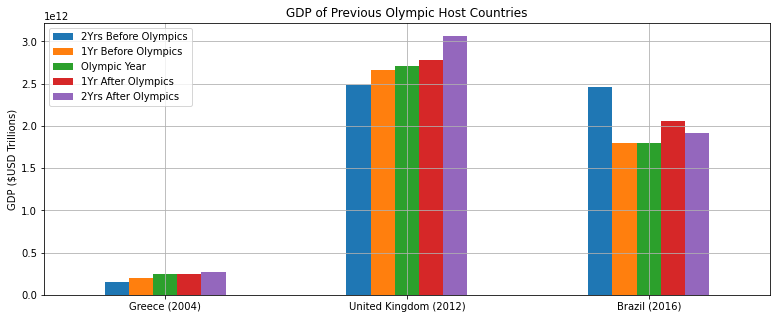

In [32]:
# Plotting bargraph for GDP of host countries
GDP_Bargraph = OlympicHostsGDP.plot.bar(x = 'Country', figsize = (13, 5))
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('GDP ($USD Trillions)')
plt.title("GDP of Previous Olympic Host Countries")
plt.legend(loc = 2)
plt.grid()
plt.savefig("Images/fig1_GDP_previous_olympic_host.png")
plt.show()

# Pulling data via wbgapi for GDP per Capita

In [13]:
# Pulling data from World Bank for United Kingdom for 2010, 2011, 2012 (olympic year), 2013, & 2014
GBR_GDP_pC = wb.data.DataFrame('NY.GDP.PCAP.CD', ['GBR'], time = (range(2010, 2015)), labels = True)
GBR_GDP_pC = GBR_GDP_pC.rename(columns = {'YR2010' : '2Yrs Before Olympics',
                                                           'YR2011' : '1Yr Before Olympics',
                                                           'YR2012' : 'Olympic Year',
                                                           'YR2013' : '1Yr After Olympics',
                                                           'YR2014' : '2Yrs After Olympics'})

# Changing the cell from "United Kingdom" to "United Kingdom (2012)" to signify the year of the Olympics
GBR_GDP_pC.at[:,'Country']='United Kingdom (2012)'
GBR_GDP_pC

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
GBR,United Kingdom (2012),39536.772681,42047.614252,42449.107666,43401.31053,47452.199137


In [14]:
# Pulling data from World Bank for Greece for 2002, 2003, 2004 (Olympic year), 2005, & 2006
GRC_GDP_pC = wb.data.DataFrame('NY.GDP.PCAP.CD', ['GRC'], time = (range(2002, 2007)), labels = True)
GRC_GDP_pC = GRC_GDP_pC.rename(columns = {'YR2002' : '2Yrs Before Olympics',
                                                           'YR2003' : '1Yr Before Olympics',
                                                           'YR2004' : 'Olympic Year',
                                                           'YR2005' : '1Yr After Olympics',
                                                           'YR2006' : '2Yrs After Olympics'})

# Changing the cell from "Greece" to "Greece(2004)" to signify the year of the Olympics
GRC_GDP_pC.at[:,'Country']='Greece (2004)'
GRC_GDP_pC

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
GRC,Greece (2004),14110.313365,18477.57836,21955.104136,22551.735767,24801.157784


In [15]:
# Pulling data from World Bank for Brazil for 2014, 2015, 2016 (Olympic year), 2017, 2018
BRA_GDP_pC = wb.data.DataFrame('NY.GDP.PCAP.CD', ['BRA'], time = (range(2014, 2019)), labels = True)
BRA_GDP_pC = BRA_GDP_pC.rename(columns = {'YR2014' : '2Yrs Before Olympics',
                                                           'YR2015' : '1Yr Before Olympics',
                                                           'YR2016' : 'Olympic Year',
                                                           'YR2017' : '1Yr After Olympics',
                                                           'YR2018' : '2Yrs After Olympics'})

# Changing the cell from "Brazil" to Brazil (2016) to signify the year of the Olympics
BRA_GDP_pC.at[:,'Country']='Brazil (2016)'
BRA_GDP_pC

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
BRA,Brazil (2016),12112.587668,8814.001418,8710.096774,9928.643063,9151.445253


In [16]:
# Appending DataFrames into one
GDP_pC_a = GRC_GDP_pC.append(GBR_GDP_pC)
GDP_pC = GDP_pC_a.append(BRA_GDP_pC).reset_index(drop = True)
GDP_pC.to_excel("GDP_pC.xlsx")
GDP_pC

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
0,Greece (2004),14110.313365,18477.578360,21955.104136,22551.735767,24801.157784
1,United Kingdom (2012),39536.772681,42047.614252,42449.107666,43401.310530,47452.199137
2,Brazil (2016),12112.587668,8814.001418,8710.096774,9928.643063,9151.445253


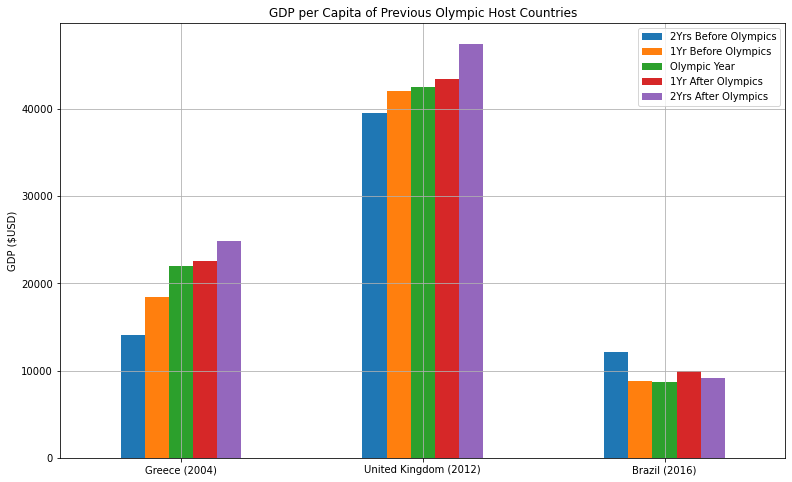

In [17]:
# Plotting bargraph for GDP per Capita of host countries
GDP_pC_Bargraph = GDP_pC.plot.bar(x = 'Country', figsize = (13, 8))
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('GDP ($USD)')
plt.title("GDP per Capita of Previous Olympic Host Countries")
plt.grid()
plt.savefig("Images/fig2_GDP_per_Capita_previous_olympic_host.png")
plt.show()

# Pulling data via wbgapi for Annual Consumer Price Inflation (%)

In [18]:
# Pulling data from World Bank for United Kingdom for 2010, 2011, 2012 (olympic year), 2013, & 2014
GBR_CnsmrInfl = wb.data.DataFrame('FP.CPI.TOTL.ZG', ['GBR'], time = (range(2010, 2015)), labels = True)
GBR_CnsmrInfl = GBR_CnsmrInfl.rename(columns = {'YR2010' : '2Yrs Before Olympics',
                                                           'YR2011' : '1Yr Before Olympics',
                                                           'YR2012' : 'Olympic Year',
                                                           'YR2013' : '1Yr After Olympics',
                                                           'YR2014' : '2Yrs After Olympics'})

# Changing the cell from "United Kingdom" to "United Kingdom (2012)" to signify the year of the Olympics
GBR_CnsmrInfl.at[:,'Country']='United Kingdom (2012)'
GBR_CnsmrInfl

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
GBR,United Kingdom (2012),2.492655,3.856112,2.573235,2.291667,1.45112


In [19]:
# Pulling data from World Bank for Greece for 2002, 2003, 2004 (Olympic year), 2005, & 2006
GRC_CnsmrInfl = wb.data.DataFrame('FP.CPI.TOTL.ZG', ['GRC'], time = (range(2002, 2007)), labels = True)
GRC_CnsmrInfl = GRC_CnsmrInfl.rename(columns = {'YR2002' : '2Yrs Before Olympics',
                                                'YR2003' : '1Yr Before Olympics',
                                                'YR2004' : 'Olympic Year',
                                                'YR2005' : '1Yr After Olympics',
                                                'YR2006' : '2Yrs After Olympics'})


# Changing the cell from "Greece" to "Greece(2004)" to signify the year of the Olympics
GRC_CnsmrInfl.at[:,'Country']='Greece (2004)'
GRC_CnsmrInfl

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
GRC,Greece (2004),3.629359,3.530652,2.898849,3.545074,3.195944


In [20]:
# Pulling data from World Bank for Brazil for 2014, 2015, 2016 (Olympic year), 2017, 2018
BRA_CnsmrInfl = wb.data.DataFrame('FP.CPI.TOTL.ZG', ['BRA'], time = (range(2014, 2019)), labels = True)
BRA_CnsmrInfl = BRA_CnsmrInfl.rename(columns = {'YR2014' : '2Yrs Before Olympics',
                                                           'YR2015' : '1Yr Before Olympics',
                                                           'YR2016' : 'Olympic Year',
                                                           'YR2017' : '1Yr After Olympics',
                                                           'YR2018' : '2Yrs After Olympics'})

# Changing the cell from "Brazil" to Brazil (2016) to signify the year of the Olympics
BRA_CnsmrInfl.at[:,'Country']='Brazil (2016)'
BRA_CnsmrInfl

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
BRA,Brazil (2016),6.32904,9.029901,8.739144,3.446373,3.66485


In [21]:
# Appending DataFrames into one
CnsmrInfl_a = GRC_CnsmrInfl.append(GBR_CnsmrInfl)
CnsmrInfl = CnsmrInfl_a.append(BRA_CnsmrInfl).reset_index(drop = True)
CnsmrInfl.to_excel("CnsmrInfl.xlsx")
CnsmrInfl

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
0,Greece (2004),3.629359,3.530652,2.898849,3.545074,3.195944
1,United Kingdom (2012),2.492655,3.856112,2.573235,2.291667,1.451120
2,Brazil (2016),6.329040,9.029901,8.739144,3.446373,3.664850


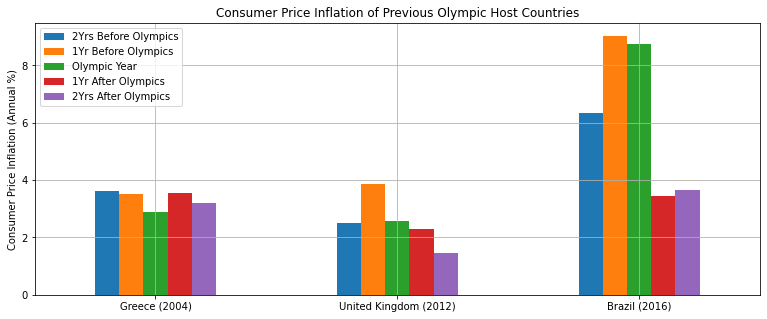

In [22]:
# Plotting bargraph for Consumer Price Inflation of host countries
Infl_Bargraph = CnsmrInfl.plot.bar(x = 'Country', figsize = (13, 5))
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('Consumer Price Inflation (Annual %)')
plt.title('Consumer Price Inflation of Previous Olympic Host Countries')
plt.grid()
plt.savefig("Images/fig3_Inflation_previous_olympic_host.png")
plt.show()

# Pulling data via wbgapi for Annual Industrial Growth (% of GDP)

In [23]:
# Pulling data from World Bank for United Kingdom for 2010, 2011, 2012 (olympic year), 2013, & 2014
GBR_Industry = wb.data.DataFrame('NV.IND.TOTL.ZS', ['GBR'], time = (range(2010, 2015)), labels = True)
GBR_Industry = GBR_Industry.rename(columns = {'YR2010' : '2Yrs Before Olympics',
                                                           'YR2011' : '1Yr Before Olympics',
                                                           'YR2012' : 'Olympic Year',
                                                           'YR2013' : '1Yr After Olympics',
                                                           'YR2014' : '2Yrs After Olympics'})

# Changing the cell from "United Kingdom" to "United Kingdom (2012)" to signify the year of the Olympics
GBR_Industry.at[:,'Country']='United Kingdom (2012)'
GBR_Industry

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
GBR,United Kingdom (2012),18.991835,18.716302,18.690537,18.931033,18.547156


In [24]:
# Pulling data from World Bank for Greece for 2002, 2003, 2004 (Olympic year), 2005, & 2006
GRC_Industry = wb.data.DataFrame('NV.IND.TOTL.ZS', ['GRC'], time = (range(2002, 2007)), labels = True)
GRC_Industry = GRC_Industry.rename(columns = {'YR2002' : '2Yrs Before Olympics',
                                                'YR2003' : '1Yr Before Olympics',
                                                'YR2004' : 'Olympic Year',
                                                'YR2005' : '1Yr After Olympics',
                                                'YR2006' : '2Yrs After Olympics'})

# Changing the cell from "Greece" to "Greece(2004)" to signify the year of the Olympics
GRC_Industry.at[:,'Country']='Greece (2004)'
GRC_Industry

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
GRC,Greece (2004),19.438722,20.517517,20.344019,17.80449,19.987243


In [25]:
# Pulling data from World Bank for Brazil for 2014, 2015, 2016 (Olympic year), 2017, 2018
BRA_Industry = wb.data.DataFrame('NV.IND.TOTL.ZS', ['BRA'], time = (range(2014, 2019)), labels = True)
BRA_Industry = BRA_Industry.rename(columns = {'YR2014' : '2Yrs Before Olympics',
                                                           'YR2015' : '1Yr Before Olympics',
                                                           'YR2016' : 'Olympic Year',
                                                           'YR2017' : '1Yr After Olympics',
                                                           'YR2018' : '2Yrs After Olympics'})

# Changing the cell from "Brazil" to Brazil (2016) to signify the year of the Olympics
BRA_Industry.at[:,'Country']='Brazil (2016)'
BRA_Industry

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
economy,,,,,,
BRA,Brazil (2016),20.472463,19.360044,18.354758,18.188502,18.749051


In [28]:
# Appending DataFrames into one
Industry_a = GRC_Industry.append(GBR_Industry)
Industry = Industry_a.append(BRA_Industry).reset_index(drop = True)
Industry.to_excel("Industry.xlsx")
Industry

,Country,2Yrs Before Olympics,1Yr Before Olympics,Olympic Year,1Yr After Olympics,2Yrs After Olympics
0,Greece (2004),19.438722,20.517517,20.344019,17.804490,19.987243
1,United Kingdom (2012),18.991835,18.716302,18.690537,18.931033,18.547156
2,Brazil (2016),20.472463,19.360044,18.354758,18.188502,18.749051


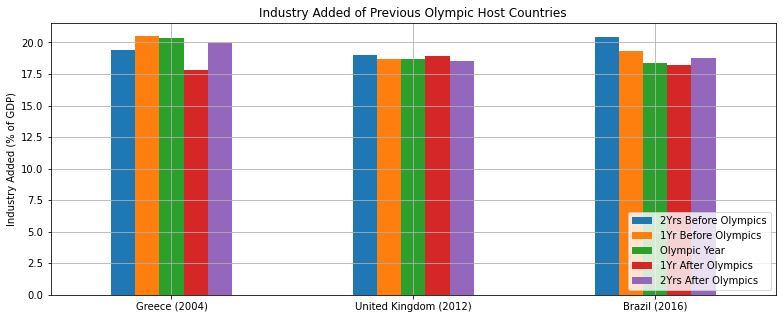

In [30]:
# Plotting bargraph for annualIndustrial Growth of host countries
Industry_Bargraph = Industry.plot.bar(x = 'Country', figsize = (13, 5))
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('Industry Added (% of GDP)')
plt.title('Industry Added of Previous Olympic Host Countries')
plt.legend(loc= 4)
plt.grid()
plt.savefig("Images/fig4_Industry_previous_olympic_host.png")
plt.show()

#  Analysis

The question our group posed was to see if there were any effects from the hosting the Summer Olympics.  Brazil hosted the Summer Olympics in 2016 in Rio de Janeiro.  Our team used some historic data prior to 2016 and data form post-2016 Summer Olympic for the analysis.  In addition, we compared data from two other Summer Olympic host countries (Greece - 2004 Summer Olympics and United Kingdom - 2012 Summer Olympics) as control data.  By creating grouped bar charts, we can easily visualize how each host country's economic metric, and make a high level analysis and conclusion based on them.  

* Sub question 1: Was Brazil's economy affected by hosting the 2016 Rio de Janeiro Summer Olympics?
A country's GDP (Gross Domestic Product) is a metric used to gauge its overall economic health.  GDP is basically the entire monetary value of a nation's goods and services produced within its boarders.

Comparing three host countries (Athens, Greece in 2004; London, UK in 2012; and Rio de Janeiro in 2016) we can theorize if there are any relationship between hosting the Olympics and the economy of the host country.  GDP data from all three cities suggest that GDP was on a upward trend the first two years prior to the Olympics for Greece and the UK.  Brazil was on a severe downward trend but then stablized and moved upward leading up to the Olympics in 2016 in Rio.  Domestic economic activity increases before the Olympics due to fiscal policies/reforms and an increase of products and services produced specifically for the Olympics (i.e. new construction for transporation, housing, increase in leisure services, etc...).  Looking at GDP per Capita, shows how much the citizens in each how country is prospering.  Greece and the UK are showing trends of increased prosperity, but Brazil points to a decrease in prosperity after the Olympics.  Government polices could be a major factor in wealth growth, but after the Olympics all countries see some increase in their prosperity.  It seems that the overall economy in Brazil was affected prior to and into the start of the Olympics in a positve way.


* Sub question 2: Was Brazil's economy better or worse than other nations that hosted the Summer Olympics?
Additional metrics to gauge the overall health of an Olympic host country's economy, is how well their industrial complex is performing and if inflation is under control.  In this analysis, we also pulled data on Annual Percentage of Consumer Price Inflation and Annual Industrial Added Value (as a percentage of GDP) for each host nation.  These two metrics can reveal if inflation has been managed and the country can maintain its industrial momentum post Olympics.  Industry Added Value will show how much industry is spending on employees, raw materials, services and taxes.  Consumer Price Inflation will gauge the monetary policies of the country to control inflation and deflation.  All three host nations have seen decrease in industrial value added to its GDP.  Consumer Price Inflation has also been decreasing overall for the host nations as well.  However, based on the data, Brazil has the biggest change in their industry and in consumer price inflation.  After the Olympics, Brazil saw a steep decline in inflation and in Industrial added value.  The Olympics did give a boost to the country's overall economy, but for Brazil, it was short lived.  Other countries show a trend to increased prosperity, but Brazil has seen a decline in their overall economy two years after the Olympics in Rio de Janeiro.  Many factors such as goverment policies regarding their economy and other fiscal policies may have played a larger role, but it appears that the Olympics in Rio de Janeiro only helped Brazil a little bit.